In [7]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
from functions import *
import scib_metrics
%matplotlib inline

In [2]:
adata = sc.read(
    "data/lung_atlas.h5ad",
    backup_url="https://figshare.com/ndownloader/files/24539942",
)

In [3]:
adata

AnnData object with n_obs × n_vars = 32472 × 15148
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    layers: 'counts'

In [4]:
sc.pp.highly_variable_genes(adata, n_top_genes=8000, flavor="cell_ranger", batch_key="batch")
sc.tl.pca(adata, n_comps=30, use_highly_variable=True)

In [5]:
adata = adata[:, adata.var.highly_variable].copy()

In [6]:
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]

In [7]:
scanoramaPredict(adata)

Found 8000 genes among all datasets
[[0.00000000e+00 4.83407080e-01 1.75884956e-01 8.51769912e-02
  4.33628319e-01 7.30088496e-02 1.43805310e-02 6.30530973e-02
  3.31858407e-03 8.84955752e-03 5.53097345e-03 6.63716814e-03
  1.54867257e-02 1.32743363e-02 5.08849558e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.49350649e-01 2.33903421e-01
  3.37525151e-01 3.74245473e-01 2.71629779e-02 1.55935614e-02
  1.63132137e-03 2.12765957e-02 1.33000831e-02 1.10663984e-02
  2.16297787e-02 1.30421595e-02 9.94243851e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.87878788e-01
  8.29004329e-01 4.97835498e-01 3.03030303e-02 6.49350649e-03
  2.16450216e-03 1.29870130e-02 2.81385281e-02 8.65800866e-03
  0.00000000e+00 2.16450216e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.04707860e-01 2.89662503e-01 1.08401084e-02 2.75103164e-03
  0.00000000e+00 5.67375887e-03 3.03408146e-02 8.29875519e-03
  0.00000000e+00 0.00000000e+00

In [8]:
adata.X

<32472x8000 sparse matrix of type '<class 'numpy.float32'>'
	with 29331973 stored elements in Compressed Sparse Row format>

In [9]:
adata.write_h5ad(filename="data/adataLung.h5ad")

In [2]:
adata = anndata.read_h5ad(filename="data/adataLung.h5ad")
adata

AnnData object with n_obs × n_vars = 32472 × 8000
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca'
    obsm: 'Scanorama', 'Unintegrated', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [14]:
sdnormalAdata, vaeSD = trainModelBenchmark(adata.copy(), "sdnormal",max_epochs=200)

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [06:22<00:00,  1.91s/it, v_num=1, train_loss_step=3.23e+3, train_loss_epoch=2.94e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [06:22<00:00,  1.91s/it, v_num=1, train_loss_step=3.23e+3, train_loss_epoch=2.94e+3]


In [15]:
normalAdata, vaeN = trainModelBenchmark(adata.copy(), "normal",max_epochs=200)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [06:02<00:00,  1.84s/it, v_num=1, train_loss_step=3.01e+3, train_loss_epoch=2.94e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [06:02<00:00,  1.81s/it, v_num=1, train_loss_step=3.01e+3, train_loss_epoch=2.94e+3]


In [16]:
mogAdata, vaeMG = trainModelBenchmark(adata.copy(), "mixofgaus",max_epochs=200)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [06:43<00:00,  2.07s/it, v_num=1, train_loss_step=3.18e+3, train_loss_epoch=2.94e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [06:43<00:00,  2.02s/it, v_num=1, train_loss_step=3.18e+3, train_loss_epoch=2.94e+3]


In [17]:
vampAdata, vaeVP = trainModelBenchmark(adata.copy(), "vamp",max_epochs=200)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/200:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 200/200: 100%|██████████| 200/200 [08:23<00:00,  2.54s/it, v_num=1, train_loss_step=2.79e+3, train_loss_epoch=2.94e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [08:23<00:00,  2.52s/it, v_num=1, train_loss_step=2.79e+3, train_loss_epoch=2.94e+3]


In [3]:
flowAdata, vaeNF = trainModelBenchmark(adata.copy(), 'normalflow', max_epochs=200)

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [29:23<00:00,  8.99s/it, v_num=1, train_loss_step=1.9e+3, train_loss_epoch=1.87e+3] 

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [29:23<00:00,  8.82s/it, v_num=1, train_loss_step=1.9e+3, train_loss_epoch=1.87e+3]


In [4]:
plotBenchmarkResults(flowAdata,keys=["Unintegrated","Scanorama", "scVI"])

Embeddings:   0%|          | 0/3 [00:00<?, ?it/s]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:Type 1: 0.47025098465383053
Embeddings:  33%|███▎      | 1/3 [00:39<01:19, 39.83s/it]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:Type 1: 0.5230484809726477
Embeddings:  67%|██████▋   | 2/3 [03:56<02:11, 131.99s/it]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:Type 1: 0.5368280149996281
Embeddings: 100%|██████████| 3/3 [04:27<00:00, 89.14s/it] 


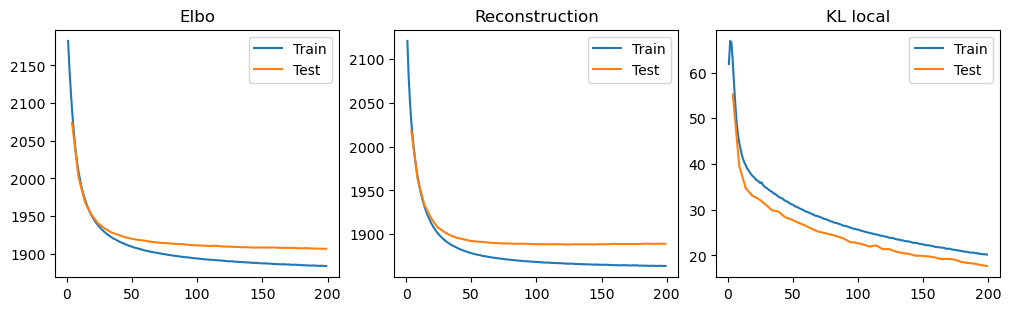

In [9]:
plotAllHistory(vaeNF)

Computing neighbors:   0%|          | 0/7 [00:00<?, ?it/s]/local/data/anaconda3/envs/BT/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/local/data/anaconda3/envs/BT/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/local/data/anaconda3/

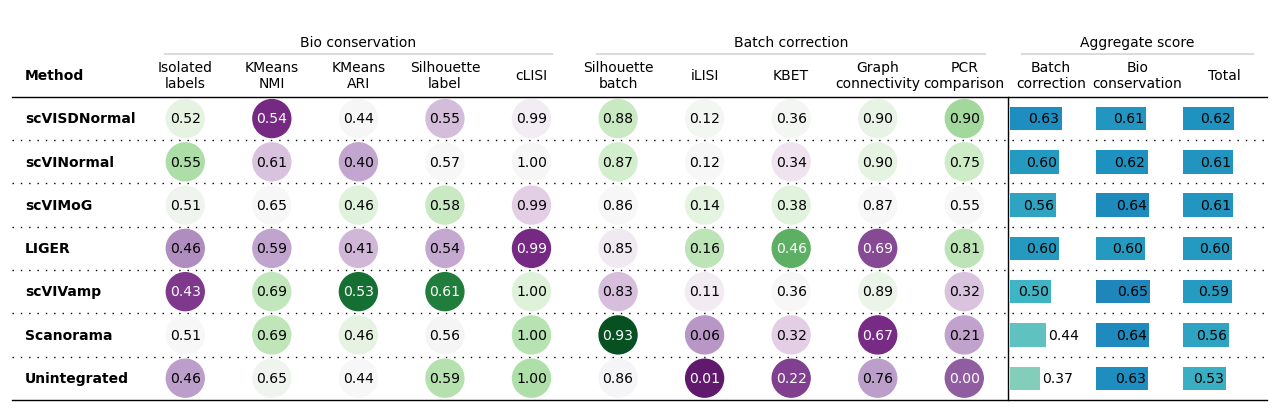

In [9]:
plotBenchmarkResultsAll(sdnormalAdata,normalAdata,mogAdata,vampAdata)

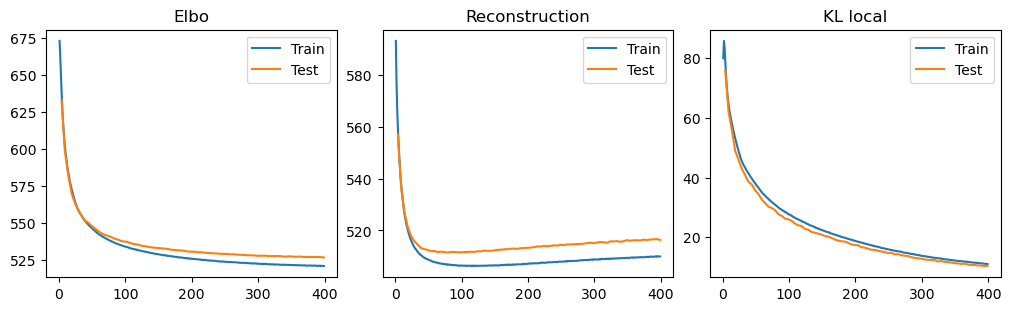

In [32]:
plotAllHistory(vaeSD)

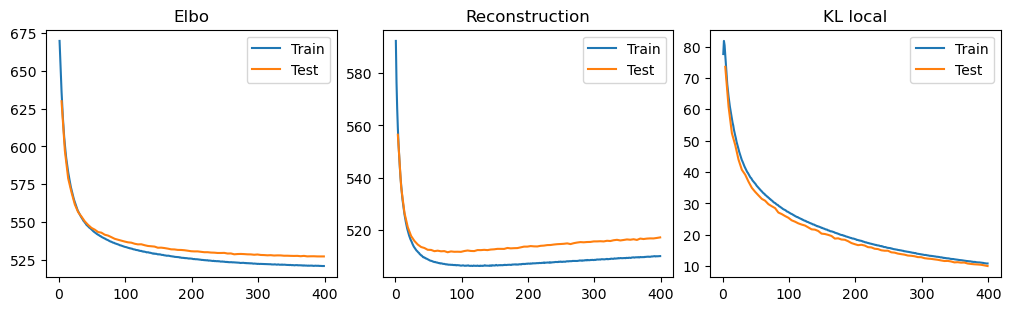

In [33]:
plotAllHistory(vaeN)

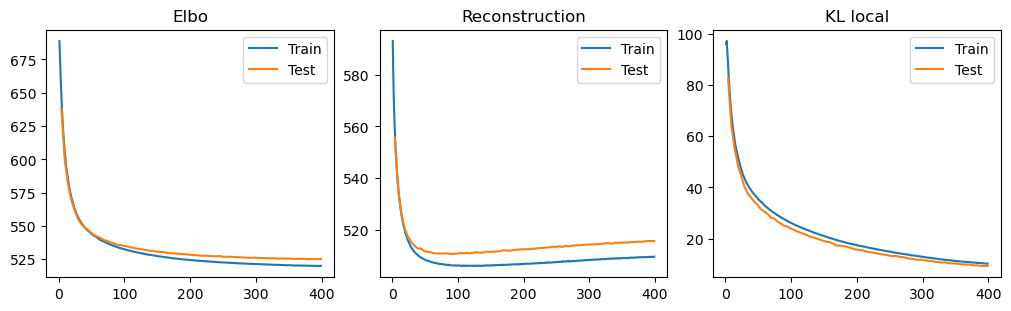

In [34]:
plotAllHistory(vaeMG)

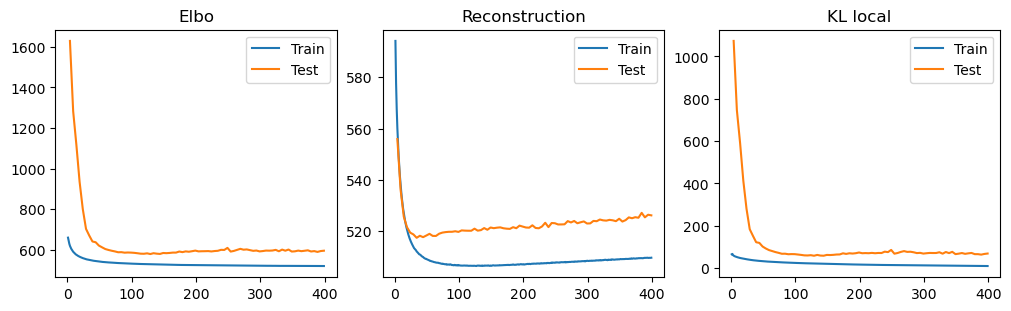

In [35]:
plotAllHistory(vaeVP)